## Importando as bibliotecas

In [1]:
import os

import numpy as np
from skimage import measure, util, color, morphology, filters, transform
from skimage.io import imread, imshow
from sklearn import model_selection, neighbors, metrics, preprocessing
# from PIL import Image

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Remove abreviação do print
# np.set_printoptions(threshold=np.inf)

## Carregando as imagens do dataset

In [2]:
def resize_with_padding(image):
    height, width = image.shape
    
    if width > height:
        padding = int((width-height)//2)
        image = np.pad(image, pad_width=( (padding, padding), (0, 0)) )
    elif height > width:
        padding = int((height-width)//2)
        image = np.pad(image, pad_width=((0, 0), (padding, padding)) )
    
    image_resized = transform.resize(image, (300, 300), anti_aliasing=False)
        
    return image_resized

In [3]:
# ds_path = 'data/train'
# img_temp = imread(os.path.join(ds_path, "bat", "bat-19_6.gif"), as_gray=True)
    
# img_resized = resize_with_padding(img_temp)

# img_temp = np.pad(img_temp, pad_width=1)
# print(img_temp.shape)
# img_float = util.img_as_float(img_temp_gray)
# print(img_float)
# imshow(img_temp)
# imshow(img_resized)

# fig, ax  = plt.subplots(1, 2, figsize=(20, 10))

# ax[0].imshow(img_temp, cmap='gray')
# ax[0].set_title("original")

# ax[1].imshow(img_resized, cmap='gray')
# ax[1].set_title("resized")

# fig.tight_layout()
# plt.show()

In [4]:
ds_path = 'data/train'

# Lista das pastas na pasta 'ds_path' (classes)
classes_list = os.listdir(ds_path)

# Lista com as imagens no dataset
image_list = []

# Lista com os rótulos das imagens
label_list = []

# Lista com os nomes das imagens
filename_list_ = []

# Percorre as classes do dataset
for classe in classes_list:
    # Listagem de todas as imagens na pasta daquela classe
    filename_list = os.listdir(os.path.join(ds_path, classe))
    
    # Percorre os arquivos na pasta atual
    for filename in filename_list:
        # Carrega a imagem
        img_temp = imread(os.path.join(ds_path, classe, filename), as_gray=True)
        
        # Resize
        img_temp = resize_with_padding(img_temp)
        
        # Padding
        img_temp = np.pad(img_temp, pad_width=1)

        # Adiciona a imagem a lista de imagens
        image_list.append(img_temp)
        
        # Adiciona o rótulo da imagem à lista de rótulos
        label_list.append(classe)
        
        # Adiciona o nome da imagem à uma lista (para fins de visualização)
        filename_list_.append(filename)

In [5]:
# Lista com os rótulos das imagens        
print(label_list)

['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 

## Convertendo os nomes das classes para índices numéricos

In [6]:
# Indices das classes dos objetos do dataset
_, _, label_list_idx = np.unique(label_list, return_index=True, return_inverse=True)

print(type(label_list_idx))
print(label_list_idx)

### label_list_idx = np.array(label_list_idx)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 

## Plotando as imagens do conjunto de dados

In [7]:
# Seleciona apenas as primeiras N imagens de cada classe
image_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
for i in range(4):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    image_list_temp += [image_list[j] for j in np.where(label_list_idx==i)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list_idx==i)[0][:6]]

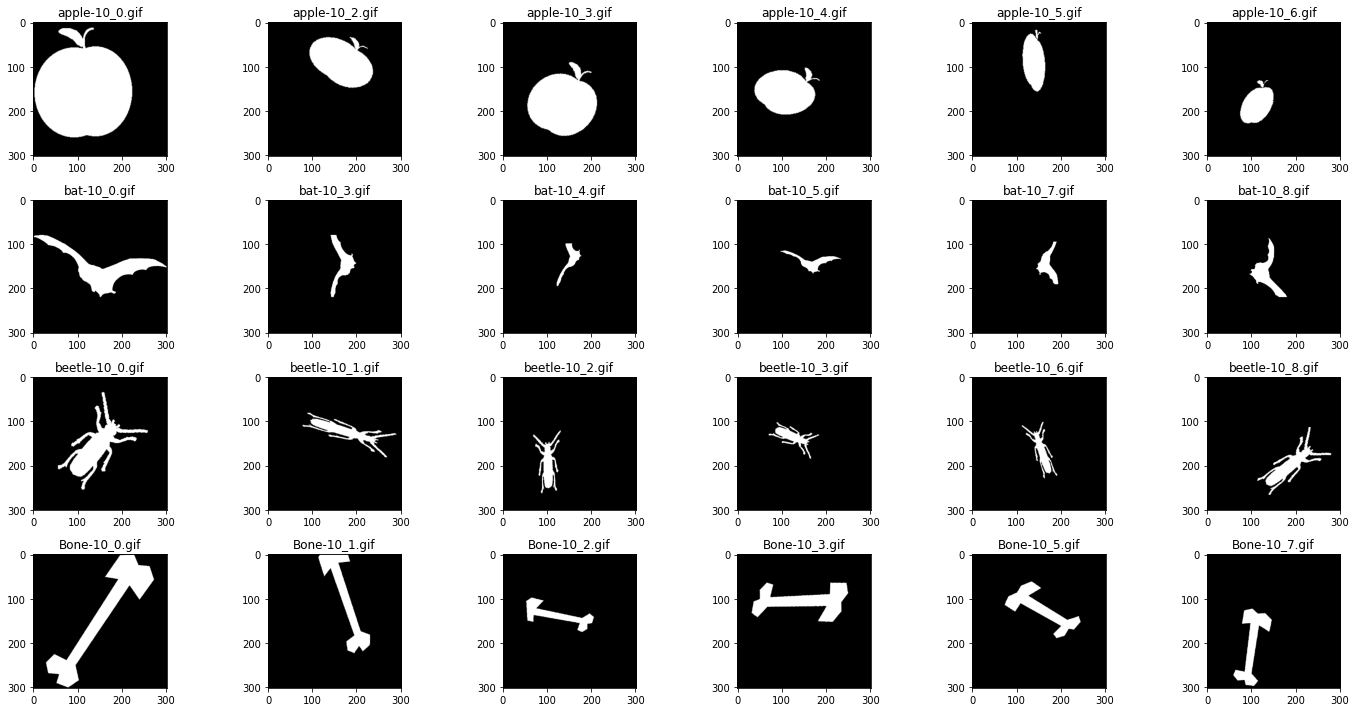

In [8]:
fig, ax  = plt.subplots(4, 6, figsize=(20, 10))

for i, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    ax[i//6, i%6].imshow(image, cmap='gray')
    ax[i//6, i%6].set_title(str(filename))

fig.tight_layout()
plt.show()

## Extraindo as características das imagens

In [24]:
# Nomes das caracteristicas computadas
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity'] #, 'euler_number', 'equivalent_diameter_area', 'extent', 'minor_axis//major_axis']

# Arranjo 2D com as caracteristicas das imagens
#   Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma caracteristica.
#   [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = []

# Lista com os rótulos das imagens
list_label = []

for i, (image, label) in enumerate(zip(image_list, label_list)):
    # DEBUG
    # print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulos (label) da imagem à lista
    list_label.append(label)
    
    # Converte a imagem para float
    img_float = util.img_as_float(image)
    
    # Segmentação por limiarização usando Otsu
    img_seg = img_float < filters.threshold_otsu(img_float)
    
    # Remove objetos na imagem com menos de N pixels.
    img_seg = morphology.remove_small_objects(img_seg, 10000)
    
    # Adiciona a imagem segmentada à lista.
    seg_list.append(img_seg)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(img_seg)
    
    # Calcula uma lista de propriedades (caracteristicas) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)}')
        continue

    # Itera pelas propriedades computadas
    for prop in props:
        # Prop. 0: Area
        area = prop.area
       
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length 
        
        # Prop. 3: Solidez
        solidity = prop.solidity 
        
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity
        
        euler_number=prop.euler_number
        equivalent_diameter_area=prop.equivalent_diameter_area
        extent=prop.extent

        # Monta o vetor de caracteristicas deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity] #, euler_number, equivalent_diameter_area, extent, minor_axis/major_axis]
    
    # Adiciona as caracteristicas desta imagem na matriz de caracteristicas
    feature_mat.append(feature_list)

In [25]:
# Converte a lista de caracteristicas para um arranjo NumPy
feature_map = np.array(feature_mat)

# Imprime a matriz de caracteristica
# with np.printoptions(precision=4, suppress=True):
#     print(feature_map)

In [26]:
# Algumas estatisticas sobre o conjunto de caracteristicas
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[39498.       351.1685   325.8259     0.4331     0.0126]
[89894.       433.3421   421.6924     0.9856     0.5516]
[81521.6706   366.1642   357.5465     0.8938     0.1805]
[9005.8634   15.6527   12.6386    0.0987    0.1083]


## Normalizando as caracteristicas

In [27]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map.std(0))

Média:
[81521.6706   366.1642   357.5465     0.8938     0.1805]
Desvio padrão:
[9005.8634   15.6527   12.6386    0.0987    0.1083]


In [28]:
# Transformada Normal de Caracteristicas
feature_map_norm = (feature_map - feature_map.mean(0)) / feature_map.std(0)

# print(feature_map)

In [29]:
with np.printoptions(precision=4, suppress=True):
    # Média das caracteristicas do conjunto de imagens
    print('Média:')
    print(feature_map_norm.mean(0))
    # Desvio padrão das caracteroisticas do conjunto de imagens
    print('Desvio padrão:')
    print(feature_map_norm.std(0))

Média:
[-0.  0. -0.  0. -0.]
Desvio padrão:
[1. 1. 1. 1. 1.]


### Plotando as caracteristicas computadas normalizadas

In [30]:
df = pd.DataFrame(feature_map_norm, columns=features)

df['class'] = label_list

### print(df)
display(df)

,area,major_axis,minor_axis,solidity,eccentricity,class
0,-3.201211,3.136687,1.949328,-3.201211,1.945635,apple
1,-0.207717,0.166187,-0.082365,-0.207717,0.694840,apple
2,-0.862179,0.929865,1.194338,-0.862179,0.225519,apple
3,-0.110558,0.195890,0.346997,-0.110558,0.160321,apple
4,0.513702,-0.483532,-0.442676,0.513702,0.102679,apple
...,...,...,...,...,...,...
499,0.792742,-0.801273,-0.429203,0.792742,-0.817290,bone
500,0.468509,-0.441096,-0.760279,0.468509,0.633552,bone
501,0.515590,-0.653728,-0.570364,0.515590,-0.036003,bone
502,0.411213,-0.546923,-0.575297,0.411213,0.193195,bone


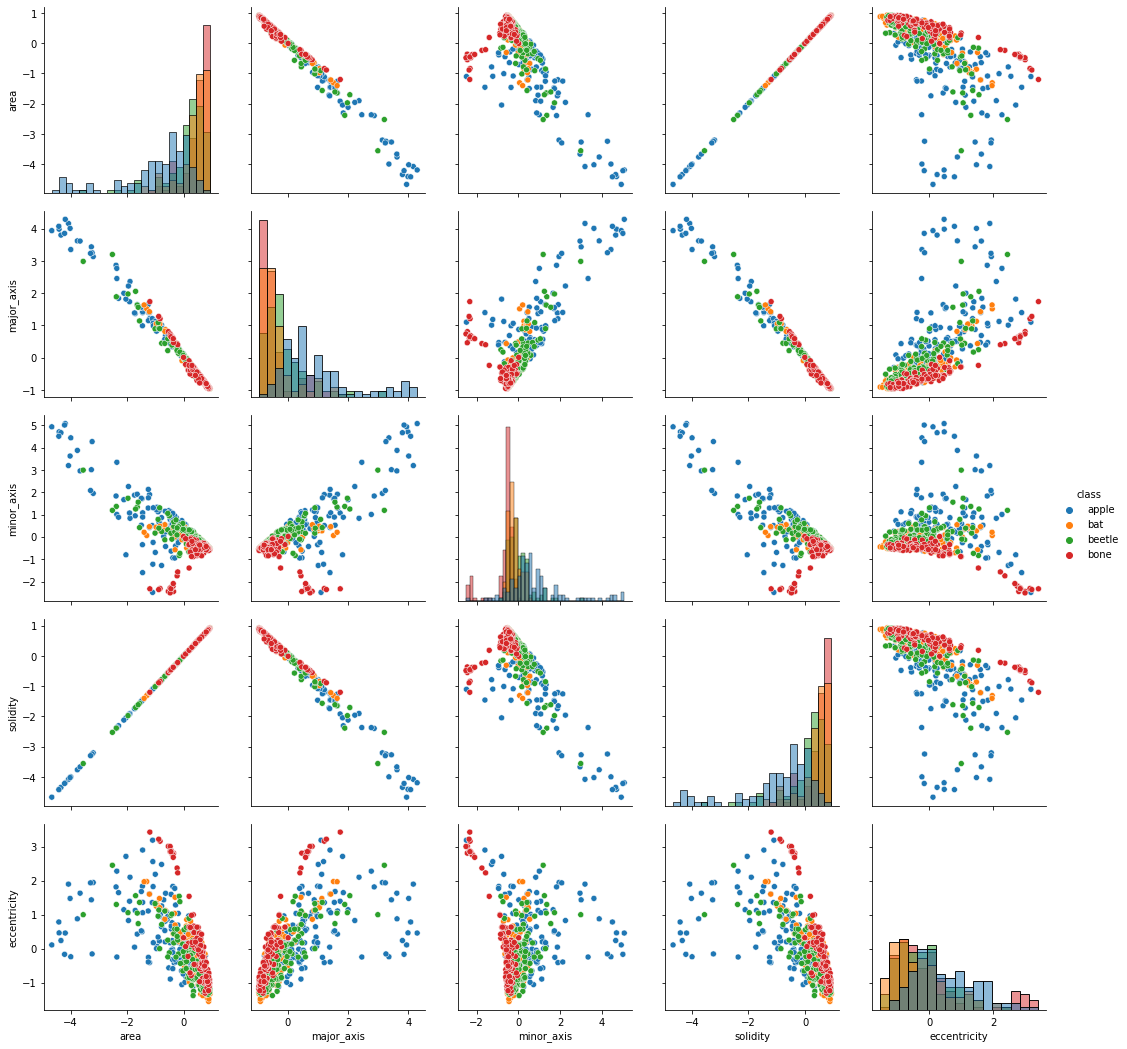

In [31]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(15, 15)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [32]:
# Selecionamos apenas solidity, eccentricity, equivalent_diameter_area, extent
feature_map_ok = feature_map_norm


In [42]:
# Separa o conjunto de dados em 'feature_map_ok', de acordo com 'label_list'. 
# 10% das imagens vão para o conjunto de testes.
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_map_ok, label_list, test_size=0.1, random_state=393)

## Normalizando as caracteristicas

In [43]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[-0.0232  0.0257  0.006  -0.0232  0.0241]
[1.019  1.016  1.0203 1.019  1.0254]


In [44]:
# Transformada Normal de Caracteristicas
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm)
    print(X_test_norm)

[[ 0.5302 -0.5666 -0.1217  0.5302 -0.8244]
 [ 0.767  -0.803  -0.3729  0.767  -0.9784]
 [ 0.7626 -0.7702 -0.437   0.7626 -0.618 ]
 ...
 [ 0.8046 -0.8234 -0.404   0.8046 -0.9525]
 [ 0.6556 -0.6624 -0.2409  0.6556 -0.8189]
 [ 0.4996 -0.5111 -0.2183  0.4996 -0.3704]]
[[ 0.1156 -0.1013 -0.3176  0.1156  0.5873]
 [ 0.554  -0.5437 -0.503   0.554   0.0962]
 [ 0.6413 -0.7178 -0.6429  0.6413 -0.0253]
 [ 0.8698 -0.9123 -0.547   0.8698 -0.8218]
 [-0.1886  0.2274  0.3475 -0.1886  0.2223]
 [ 0.5451 -0.53   -0.3313  0.5451 -0.1814]
 [ 0.1919 -0.251   0.2554  0.1919 -0.7888]
 [-0.1371  0.241   0.616  -0.1371 -0.199 ]
 [ 0.3208 -0.2964  0.1896  0.3208 -0.7557]
 [ 0.9351 -0.9653 -0.5152  0.9351 -1.3195]
 [-0.48    0.5144  0.9182 -0.48   -0.1421]
 [ 0.5512 -0.5979 -0.101   0.5512 -1.0708]
 [-0.2126  0.1971  0.0788 -0.2126  0.5377]
 [ 0.3819 -0.4805 -0.1367  0.3819 -0.4745]
 [ 0.7441 -0.7795 -0.4845  0.7441 -0.5198]
 [ 0.3687 -0.3551  0.1051  0.3687 -0.7164]
 [ 0.443  -0.47    0.0042  0.443  -0.8503]
 [ 0.

## Classificando usando K-vizinhos mais próximos
---

In [45]:
# Constrói um classificador do tipo K-NN
# K = 3
clf = neighbors.KNeighborsClassifier(n_neighbors=3)

# Treinando o classificador
clf.fit(X_train_norm, y_train)

# Testando o classificador
pred = clf.predict(X_test_norm)

## Avaliando o modelo
---

In [46]:
# Acertos
acertos = y_test == pred

print('\n Predição:')
print(pred)
print('\nReal:')
print(y_test)
print('\nAcerto/Erro:')
print(acertos.astype(int))


 Predição:
['apple' 'apple' 'bone' 'bone' 'apple' 'bat' 'beetle' 'apple' 'beetle'
 'bat' 'apple' 'bat' 'apple' 'bat' 'bone' 'apple' 'bat' 'bone' 'bone'
 'apple' 'bone' 'bat' 'bat' 'bat' 'apple' 'beetle' 'bat' 'beetle' 'bat'
 'bat' 'bone' 'bat' 'beetle' 'beetle' 'beetle' 'bone' 'apple' 'apple'
 'apple' 'bone' 'bat' 'bone' 'bone' 'bat' 'bat' 'bat' 'apple' 'bat'
 'beetle' 'beetle' 'bone']

Real:
['beetle', 'bat', 'bat', 'bat', 'beetle', 'bone', 'beetle', 'apple', 'apple', 'bat', 'beetle', 'beetle', 'beetle', 'bone', 'bone', 'apple', 'bat', 'bone', 'bone', 'apple', 'bone', 'bat', 'bat', 'bat', 'beetle', 'beetle', 'apple', 'beetle', 'bone', 'beetle', 'bat', 'bat', 'beetle', 'bone', 'bone', 'bone', 'apple', 'beetle', 'apple', 'bone', 'bat', 'bone', 'bone', 'apple', 'beetle', 'beetle', 'bat', 'bone', 'beetle', 'bat', 'beetle']

Acerto/Erro:
[0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 0 0 1 0 0]


### Matriz de confusão e o relatório de treinamento

In [47]:
print('\nMatriz de confusão:')
print(metrics.confusion_matrix(y_test, pred))

print('\nRelatório de classificação:')
print(metrics.classification_report(y_test, pred))


Matriz de confusão:
[[5 2 1 0]
 [2 7 1 3]
 [6 4 5 1]
 [0 4 2 8]]

Relatório de classificação:
              precision    recall  f1-score   support

       apple       0.38      0.62      0.48         8
         bat       0.41      0.54      0.47        13
      beetle       0.56      0.31      0.40        16
        bone       0.67      0.57      0.62        14

    accuracy                           0.49        51
   macro avg       0.50      0.51      0.49        51
weighted avg       0.52      0.49      0.49        51

